In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = "MatrizTMI.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

      ID_CIDERH REGION   FECHA_RBE  TEMP_MAX_RBE      LAT_Y      LON_X
0      M_001_AH      I  2006-01-01         14.44 -20.678125 -68.707308
1      M_001_AH      I  2006-01-02         17.30 -20.678125 -68.707308
2      M_001_AH      I  2006-01-03         16.59 -20.678125 -68.707308
3      M_001_AH      I  2006-01-04         17.49 -20.678125 -68.707308
4      M_001_AH      I  2006-01-05         17.98 -20.678125 -68.707308
...         ...    ...         ...           ...        ...        ...
40301  M_212_AA      I  1994-10-16         22.20 -20.533000 -70.183000
40302  M_212_AA      I  1995-06-14         20.40 -20.533000 -70.183000
40303  M_212_AA      I  1996-01-14         25.00 -20.533000 -70.183000
40304  M_212_AA      I  1997-05-12         24.00 -20.533000 -70.183000
40305  M_212_AA      I  1998-11-10         20.90 -20.533000 -70.183000

[40306 rows x 6 columns]


ID_CIDERH   M_001_W   M_002_Q   M_002_W   M_019_A
ID_CIDERH                                        
M_001_W    1.000000  0.867882  0.893577  0.388694
M_002_Q    0.867882  1.000000  0.936968  0.509051
M_002_W    0.893577  0.936968  1.000000  0.530793
M_019_A    0.388694  0.509051  0.530793  1.000000


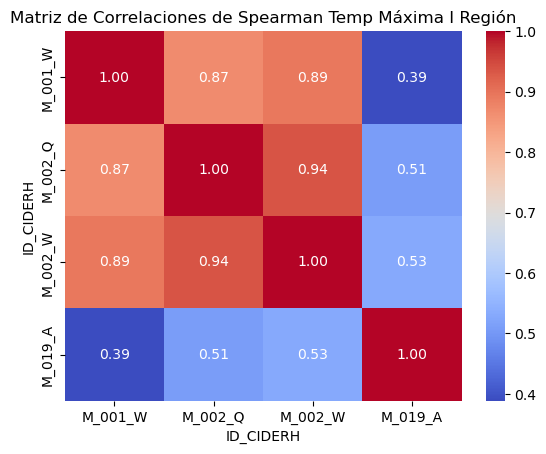

In [3]:
# Lista de estaciones específicas
estaciones_especificas = ['M_001_W', 'M_002_W', 'M_002_Q', 'M_019_A']

# Filtra los datos para las estaciones específicas
datos_especificos = datos[datos['ID_CIDERH'].isin(estaciones_especificas)]

# Pivotar los datos para obtener una matriz de temperaturas mínimas por fecha y estación
matriz_temp_min = datos_especificos.pivot(index='FECHA_RBE', columns='ID_CIDERH', values='TEMP_MAX_RBE')

# Calcular la matriz de correlaciones de Spearman
matriz_correlaciones = matriz_temp_min.corr(method='spearman')

# Mostrar la matriz de correlaciones
print(matriz_correlaciones)

# Visualizar la matriz de correlaciones con un mapa de calor usando seaborn
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones de Spearman Temp Máxima I Región')
plt.show()